# SVM and kernels

Kernels concept get adopted in variety of ML algorithms (e.g. Kernel PCA, Gaussian Processes, kNN, ...).

So in this task you are to examine kernels for SVM algorithm applied to rather simple artificial datasets.

To make it clear: we will work with the classification problem through the whole notebook. 

In [1]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

Let's generate our dataset and take a look on it.

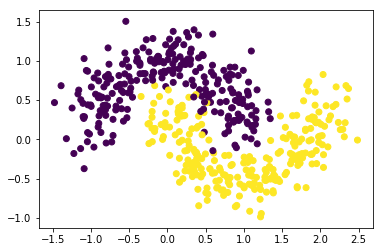

In [2]:
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)

## 1.1 Pure models.
First let's try to solve this case with good old Logistic Regression and simple (linear kernel) SVM classifier.

Train LR and SVM classifiers (choose params by hand, no CV or intensive grid search neeeded) and plot their decision regions. Calculate one preffered classification metric.

Describe results in one-two sentences.

_Tip:_ to plot classifiers decisions you colud use either sklearn examples ([this](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py) or any other) and mess with matplotlib yourself or great [mlxtend](https://github.com/rasbt/mlxtend) package (see their examples for details)

_Pro Tip:_ wirte function `plot_decisions` taking a dataset and an estimator and plotting the results cause you want to use it several times below

In [8]:
from sklearn.metrics import f1_score, accuracy_score
def plot_decisions(X, y, estimator, label):
    estimator.fit(X, y)
    fig = plt.figure(figsize=(10, 8))
    fig = plot_decision_regions(X=X, y=y, clf=estimator, legend=2)
    plt.title(label)
    print('Accuracy :', accuracy_score(y, estimator.predict(X)))
    print('F1 :', f1_score(y, estimator.predict(X), average='micro'))
    plt.show()
    

/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy : 0.856
F1 : 0.856


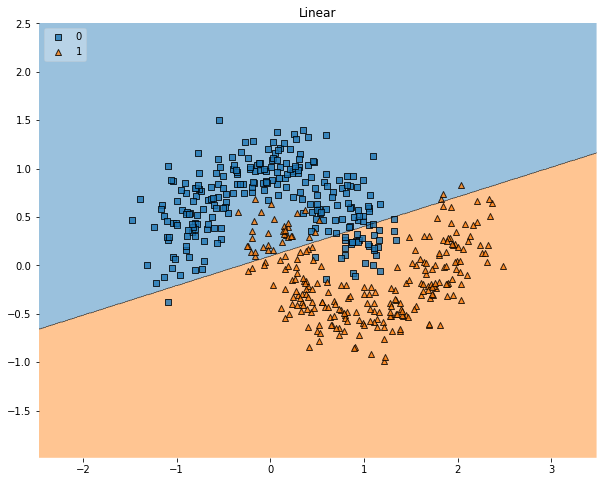

Accuracy : 0.858
F1 : 0.858


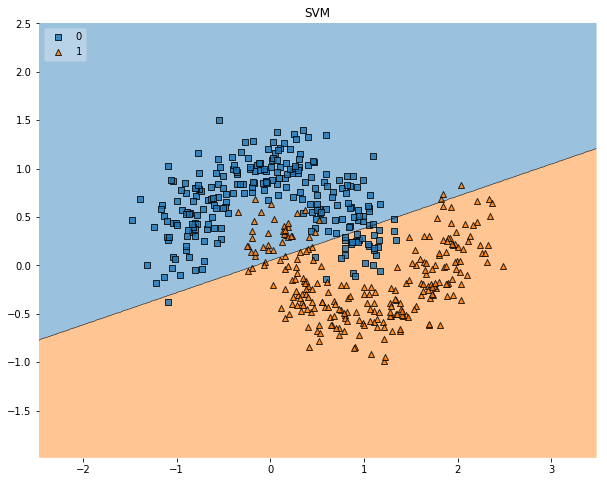

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from mlxtend.plotting import plot_decision_regions

lr = LogisticRegression(penalty='l2',  class_weight='balanced') # add some params
plot_decisions(moons_points, moons_labels, lr, 'Linear')

svm = SVC(kernel='linear', class_weight='balanced')
plot_decisions(moons_points, moons_labels, svm, 'SVM')


**Вывод**: особых плюсов в этом пример от использования svm с kernel = 'linear' нет

## 1.2 Kernel tirck

![keep-calm](imgs/keep-calm.jpg)

Now use different kernels (`poly`, `rbf`, `sigmoid`) on SVC to get better results. Play `degree` parameter and others.

For each kernel estimate optimal params, plot decision regions, calculate metric you've chosen eariler.

Write couple of sentences on:

* What have happenned with classification quality?
* How did decision border changed for each kernel?
* What `degree` have you chosen and why?

Accuracy : 0.906
F1 : 0.906


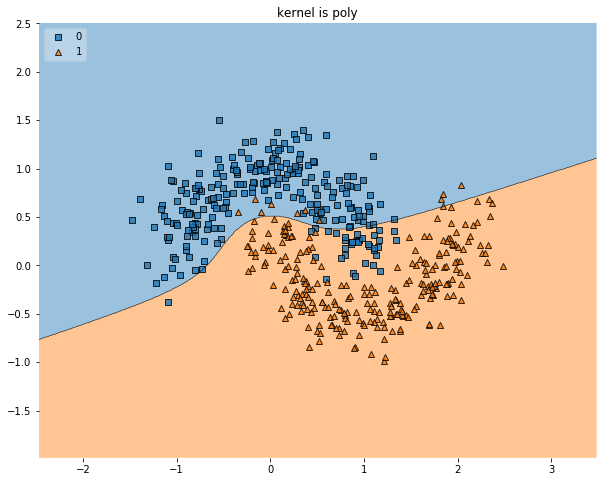

{'degree': 3, 'gamma': 0.9, 'kernel': 'poly'}


Accuracy : 0.974
F1 : 0.974


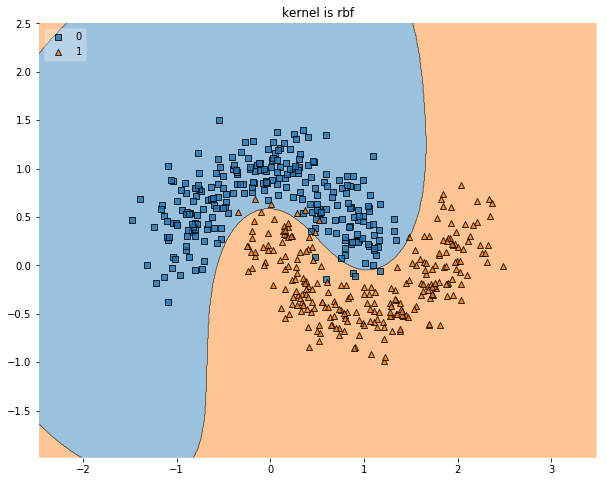

{'degree': 3, 'gamma': 0.8, 'kernel': 'rbf'}


Accuracy : 0.846
F1 : 0.8459999999999999


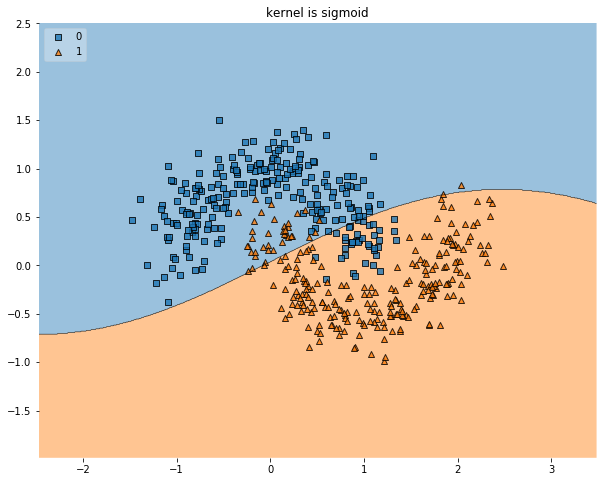

{'degree': 3, 'gamma': 0.1, 'kernel': 'sigmoid'}




In [10]:
from sklearn.model_selection import GridSearchCV

for ker in ['poly', 'rbf', 'sigmoid']:
    grSr = GridSearchCV(estimator = SVC(), 
                        cv = 5, param_grid={'degree':np.arange(3, 8),
                                           'kernel': [ker],
                                            'gamma': np.linspace(0.1, 1, 10)},
                        scoring='accuracy', n_jobs=-1)
    plot_decisions(moons_points, moons_labels, grSr, 'kernel is ' + ker)
    print(grSr.best_params_)
    print()
    print()

**Вывод:** Качество улучшилось, так как мы поменяли kernel. Для poly - там график, как полином, rbf - похоже на выпуклую область, sigmoid - сигмоидная функция.
Я выбрал 3, потому что так качество лучше

## 1.3 Simpler solution (of a kind)
What is we could use Logisitc Regression to successfully solve this task?

Feature generation is a thing to help here. Different techniques of feature generation are used in real life, couple of them will be covered in additional lectures.

In particular case simple `PolynomialFeatures` ([link](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)) are able to save the day.

Generate the set of new features, train LR on it, plot decision regions, calculate metric.

* Comare SVM's results with this solution (quality, borders type)
* What degree of PolynomialFeatures have you used? Compare with same SVM kernel parameter.

/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy : 0.976
F1 : 0.976


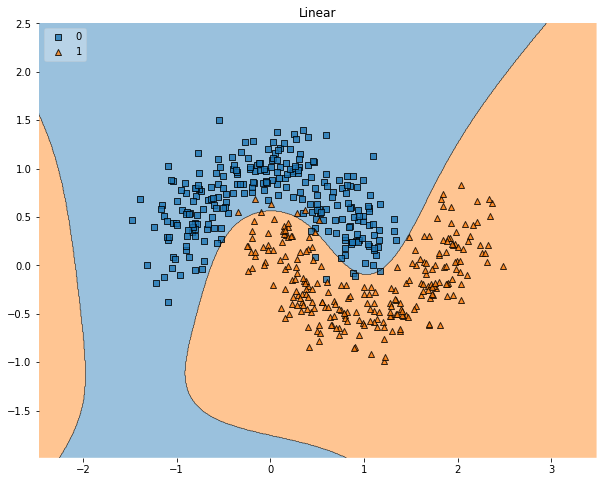

{'scaller__degree': 6}


In [11]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

scaler = PolynomialFeatures()
lr = LogisticRegression(penalty='l2',  class_weight='balanced') # add some params

pipe = Pipeline(steps=[('scaller', scaler), ('logistic', lr)])

grSr = GridSearchCV(estimator = pipe, 
                    cv = 5, param_grid={'scaller__degree':np.arange(1, 20)},
                    scoring='accuracy', n_jobs=-1)
plot_decisions(moons_points, moons_labels, grSr, 'Linear')
print(grSr.best_params_)


**Вывод:** Качество лучше чем самое лучшее у svm (rbf). Использовал степень многочлена 6, т.к на ней качество выше. Это примерно как kernel = 'poly' и kernel='rbf'


## 1.4 Harder problem

Let's make this task a bit more challenging via upgrading dataset:

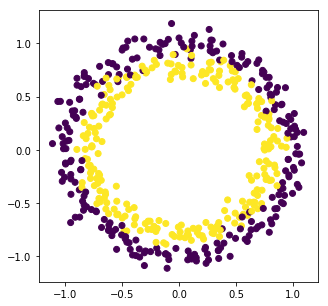

In [12]:
from sklearn.datasets import make_circles

circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)

plt.figure(figsize=(5, 5))
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=circles_labels)

And even more:

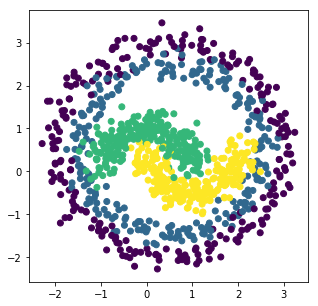

In [13]:
points = np.vstack((circles_points*2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2)) # + 2 to distinct moons classes

plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], c=labels)

Now do your best using all the approaches above!

Tune LR with generated features, SVM with appropriate kernel of your choice. You may add some of your loved models to demonstrate their (and your) strength. Again plot decision regions, calculate metric.

Justify the results in a few phrases.

## LR ##

/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy : 0.942
F1 : 0.942


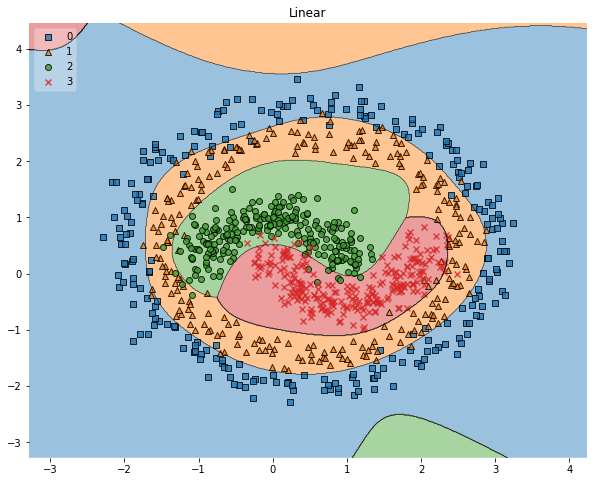

{'scaller__degree': 7}


In [14]:
scaller = PolynomialFeatures()
lr = LogisticRegression(penalty='l2',  class_weight='balanced') # add some params

pipe = Pipeline(steps=[('scaller', scaler), ('logistic', lr)])

grSr = GridSearchCV(estimator = pipe, 
                    cv = 5, param_grid={'scaller__degree':np.arange(1, 20)},
                    scoring='accuracy', n_jobs=-1)
plot_decisions(points, labels, grSr, 'Linear')
print(grSr.best_params_)

## SVM ##

Accuracy : 0.935
F1 : 0.935


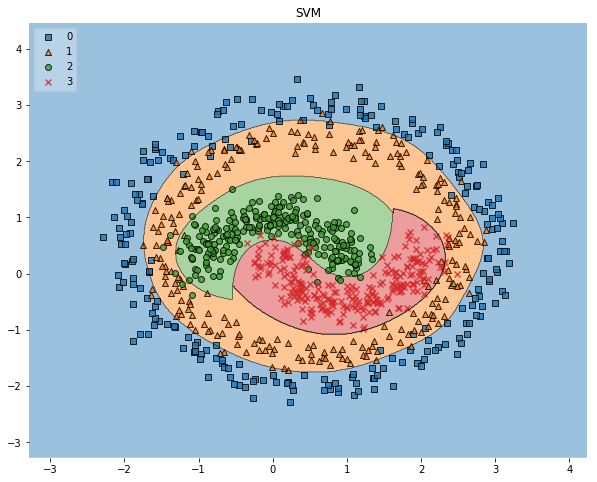

{'degree': 1, 'gamma': 1.0, 'kernel': 'rbf'}


In [15]:
grSr = GridSearchCV(estimator = SVC(), 
                        cv = 5, param_grid={'degree':np.arange(1, 8),
                                           'kernel': ['poly', 'rbf', 'sigmoid'],
                                            'gamma': np.linspace(0.1, 1, 10)},
                        scoring='accuracy', n_jobs=-1)
plot_decisions(points, labels, grSr, 'SVM')
print(grSr.best_params_)

**Вывод:** Даже очень сложные данные данные, можно разделить путем разных трюков, типа увеличение количества параметров, и тд.. Лучше всего у меня получилось с моделью PolynomialFeatures + LogisticRegression